#### > Gozde Orhan

# Data Programming Project - Turkey Political Opinions Dataset

## 1. Introduction
In scope of Data Programming course assignment, a dataset is acquired through Kaggle. After examination of survey data named “Turkey Political Opinions”, it is concluded that the dataset is suitable for predicting participant’s political party preference with respect to their given answers to number of political orientation questions. Hence, scope of the project will be prediction of the political view (conservative/left-wing) feature through Logistic Regression.

In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from tabulate import tabulate
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 2. Data Brief
Prior to Turkish General Election took place on 24th of June 2018, Mr. Yunus Emre Gundogmus and his colleagues conducted a survey concerning Turkish citizens and their political orientation. The survey data can be found at Kaggle under the name of “Turkey Political Opinions”. Survey questions consist of demographic questions such as gender, age, region, qualification as well as 10 polar opinion questions and participant’s choice of political party. In order to gain more insight to survey, Mr. Gundogmus has been contacted and access to questions provided. However, it is noted that the survey is conducted in Turkish. Therefore all the information is translated to English. Translation of survey questions are as follows:
1.	Please specify your gender. 
2.	Please state your age. (5 categories)
3.	Please state the region you are living in.
4.	Please state your qualification.
5.	Q1: Do you think Turkey's economy is strong?
6.	Q2: Do you think Turkey needs reforms in education?
7.	Q3: Are you oppose to privatization?
8.	Q4: Should death penalty be allowed for certain crimes?
9.	Q5: Do you believe Turkey's journalists are neutral enough?
10.	Q6: Do you support the law that bans sale of alcohol after 22:00?
11.	Q7: Do you prefer living in a secular state?
12.	Q8: Do you support the abortion ban?
13.	Q9: Do you think state of emergency restricts freedoms in Turkey?
14.	Q10: Would you like to see a new party in the parliament?
15.	Political View: Which party do you support?

In [2]:
#Read survey data
df = pd.read_csv('turkeypolitics885.csv')
df.head(2)

,Timestamp,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,5/11/2018 1:26:14,Erkek,18-30,Marmara,Lisans,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,IYI PARTI
1,5/11/2018 1:28:11,Erkek,18-30,Marmara,Lisans,Evet,Evet,Hayır,Evet,Hayır,Evet,Hayır,Evet,Hayır,Hayır,AKP


In [3]:
#Observing number of participants
participants = df.shape[0]
print("Total number of participants: {}".format(participants))

Total number of participants: 885


Mr. Gundogmus stated that currently there are more than 15.000 responses which they benefited from during their own analysis. However, he is not allowed to share that data on Kaggle yet. Therefore, during this assignment, dataset with sample size of 885 will be used. 

## 3. Data Preparation

- #### 1. The ‘Timestamp’ column which is not relevant to the project scope is dropped in scope of cleaning. 

In [4]:
#Drop columns not related to analysis
df = df.drop(['Timestamp'], axis = 1)
df.head(2)

,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,Erkek,18-30,Marmara,Lisans,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,IYI PARTI
1,Erkek,18-30,Marmara,Lisans,Evet,Evet,Hayır,Evet,Hayır,Evet,Hayır,Evet,Hayır,Hayır,AKP


- #### 2.	New column names are assigned in scope of tidying so that the analysis will be more comprehensible to others reading the code.

In [5]:
#Renaming columns (translation)
df.columns = ['Gender','Age','Region','Education','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Political_View']
df.head(2)

,Gender,Age,Region,Education,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Political_View
0,Erkek,18-30,Marmara,Lisans,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,IYI PARTI
1,Erkek,18-30,Marmara,Lisans,Evet,Evet,Hayır,Evet,Hayır,Evet,Hayır,Evet,Hayır,Hayır,AKP


- #### 3.	Due to the fact that survey sample was formed of Turkish citizens, survey is conducted in Turkish. In order the analysis to address larger number of people, translation of dataset is done through mapping technique. 

In [6]:
#Translation of dataset to English from Turkish
mapping = {'Erkek':'Male','Kadın':'Female', #gender
           'Ege':'Aegean','Güneydoğu':'Southeastern Anatolia','Karadeniz':'Black Sea', #regin
           'Akdeniz':'Mediterranean','Doğu Anadolu':'Eastern Anatolia','İç Anadolu':'Central Anatolia', #region
           'İlkokul':'Primary School','Lise':'High School','Ön Lisans':'Foundation', #qualification
           'Lisans':'Bachelors','Lisans Üstü':'Postgrad','Ortaokul':'Secondary School', #qualitication
           'Evet':'Yes','Hayır':'No', #answers to questions Q1-Q10
           'DIĞER':'Other' #an option to political view question
          }
df1=df.replace(mapping)
df1.head()

,Gender,Age,Region,Education,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Political_View
0,Male,18-30,Marmara,Bachelors,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,IYI PARTI
1,Male,18-30,Marmara,Bachelors,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,AKP
2,Female,18-30,Marmara,Bachelors,No,Yes,No,No,No,No,Yes,No,Yes,Yes,Other
3,Male,0-18,Marmara,High School,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,IYI PARTI
4,Male,18-30,Marmara,Foundation,No,Yes,Yes,Yes,No,No,Yes,Yes,No,No,IYI PARTI


- #### 4.	Variable types are assigned to appropriate data types which are nominal categorical and ordinal categorical in scope of data pre-processing. In this step, a for-loop is used to address efficiency concerns.

Through the above 15 questions, nominal categorical and ordinal categorical variables are obtained. Ordinal categorical variables are obtained through age and qualification questions whereas nominal categorical variables are obtained through rest of the questions. 

In [7]:
#Observe data types of each column
df1.dtypes

Gender            object
Age               object
Region            object
Education         object
Q1                object
Q2                object
Q3                object
Q4                object
Q5                object
Q6                object
Q7                object
Q8                object
Q9                object
Q10               object
Political_View    object
dtype: object

In [8]:
#Setting data types
for i in df1.columns:
    if i=='Age': #setting an ordinal variable
        Age = ['0-18','18-30','30-50','50-60','60+']
        df1[i] = df1[i].astype(CategoricalDtype(categories=Age,ordered=True))
    elif i=='Education': #setting an ordinal variable
        Education = ['Primary School','Secondary School','High School','Foundation','Bachelors','Postgrad']
        df1[i] = df1[i].astype(CategoricalDtype(categories=Education,ordered=True))
    else: #setting a nominal variable
        df1[i] = df1[i].astype('category')
df1.dtypes

Gender            category
Age               category
Region            category
Education         category
Q1                category
Q2                category
Q3                category
Q4                category
Q5                category
Q6                category
Q7                category
Q8                category
Q9                category
Q10               category
Political_View    category
dtype: object

- #### 5.	No filling is done due to the fact that all survey questions were required to fill thus there were no missing values in the dataset.

In [9]:
display(df1.isna().sum())

Gender            0
Age               0
Region            0
Education         0
Q1                0
Q2                0
Q3                0
Q4                0
Q5                0
Q6                0
Q7                0
Q8                0
Q9                0
Q10               0
Political_View    0
dtype: int64

## 4. Descriptives
Simple statistics are observed in line with the characteristics of variables. Mode is observed for both nominal and ordinal variables whereas in addition to mode, median is observed for ordinal variables. 

In [10]:
#Univariate Analysis
#Modes of nominal and ordinal variables
a=[]
for i in df1.columns:
    a.append((i,df1.describe()[i][2]))
print(tabulate(a,headers=["Column Name",'Mode']))

Column Name     Mode
--------------  -----------
Gender          Male
Age             0-18
Region          Marmara
Education       High School
Q1              No
Q2              Yes
Q3              Yes
Q4              Yes
Q5              No
Q6              No
Q7              Yes
Q8              No
Q9              Yes
Q10             Yes
Political_View  IYI PARTI


In [11]:
#Medians of ordinal variables
age_med=Age[int(df1['Age'].cat.codes.median())]
edu_med=Education[int(df1['Education'].cat.codes.median())]
table=[['Age',age_med],['Education',edu_med]]
print(tabulate(table,headers=['Column Name','Median']))

Column Name    Median
-------------  -----------
Age            18-30
Education      High School


## 5. Visualisations
#### In order to gain more insight to dataset in scope of exploratory analysis, demographic variables are visualised.

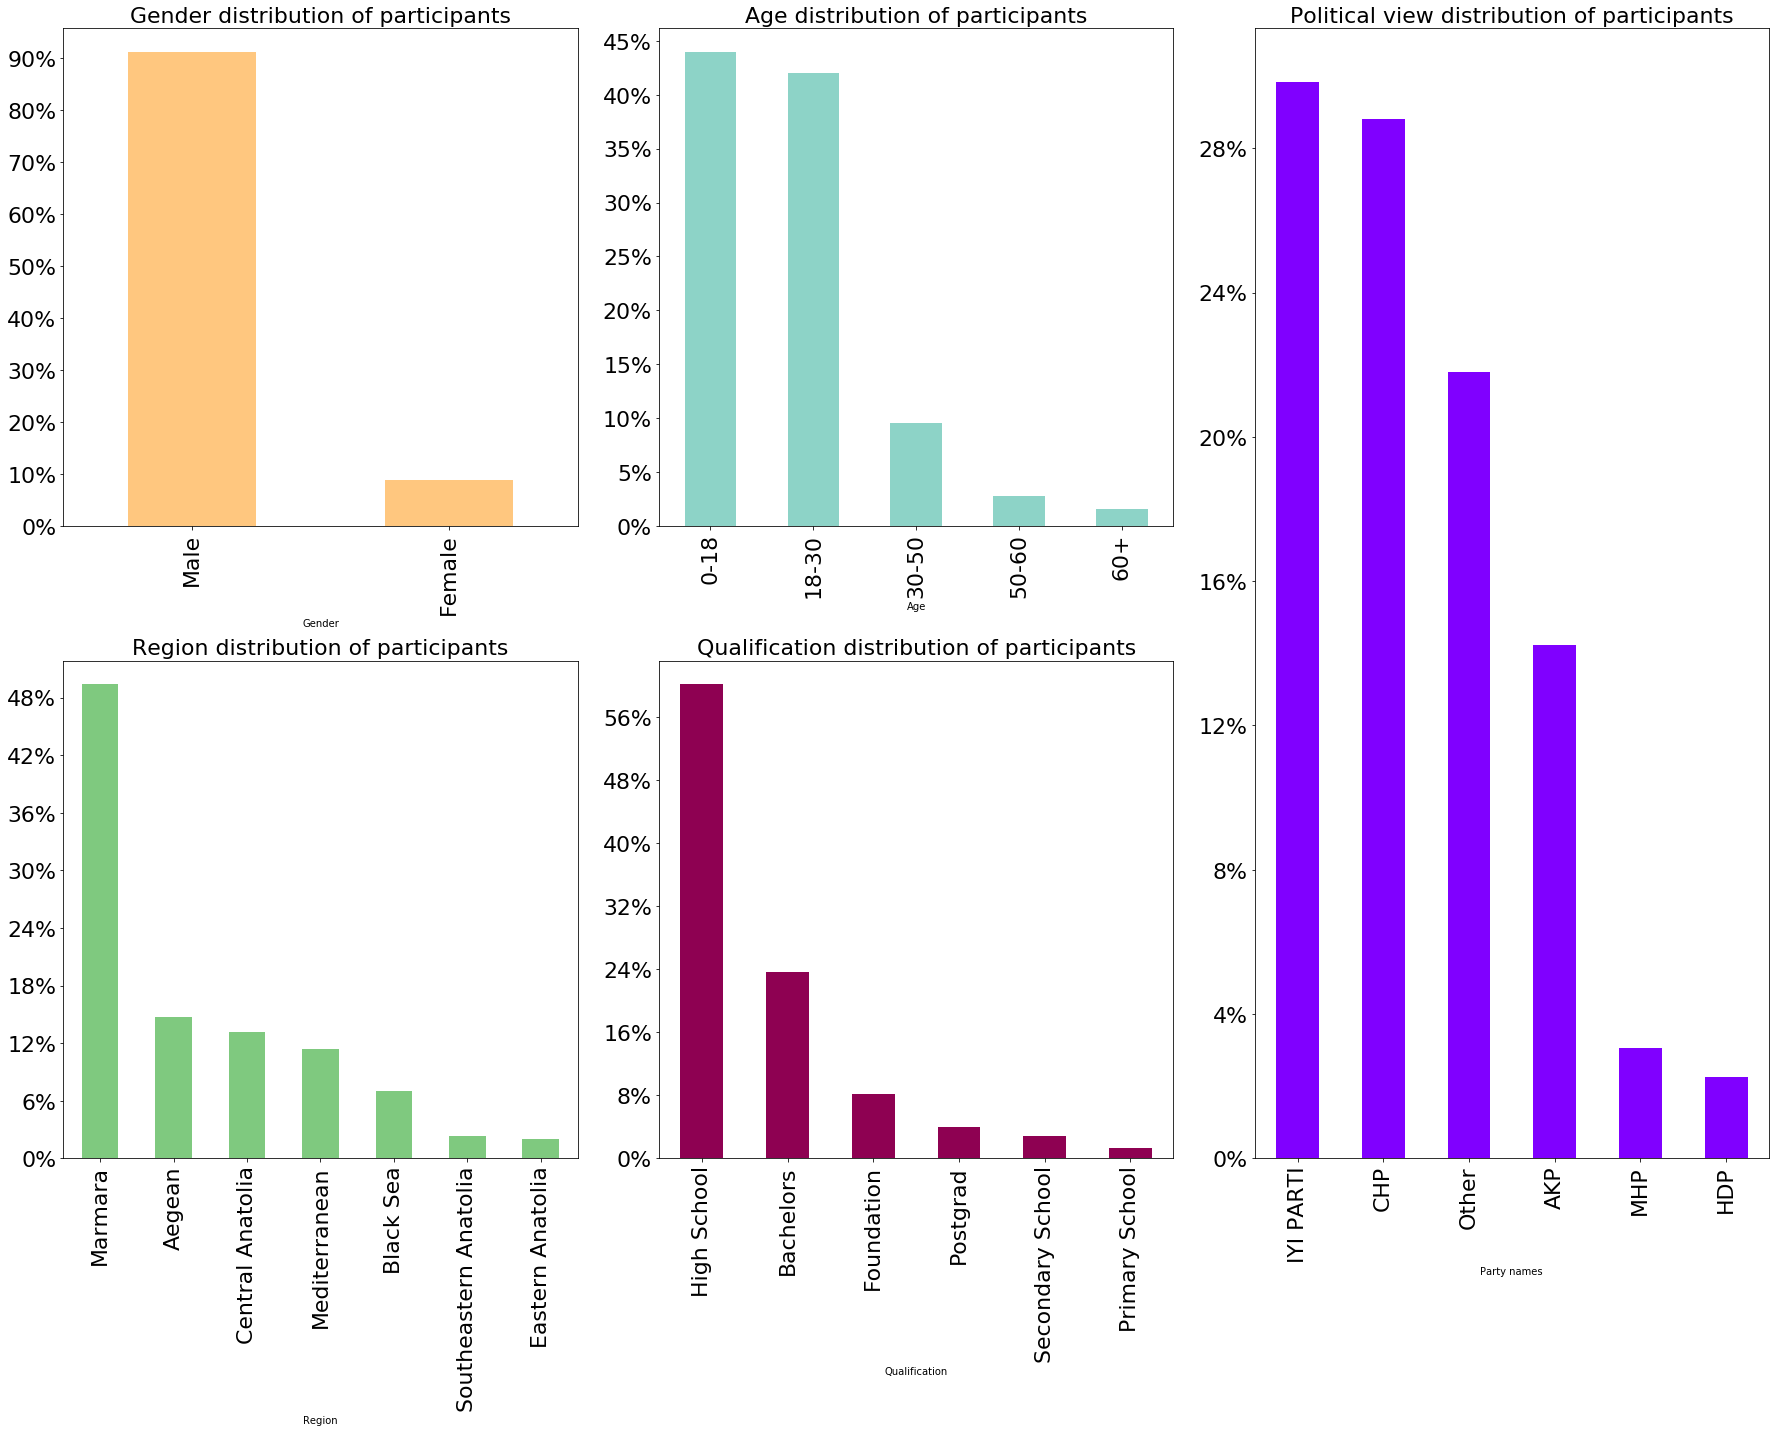

In [12]:
#Plotting
fig = plt.figure(figsize=(25,20))

#Gender distribution of the sample
fig.add_subplot(2,3,1)
gender_dem = ((df1['Gender'].value_counts())/participants)*100
ax = gender_dem.plot.bar(colormap='copper_r',fontsize=22)
ax.set_title('Gender distribution of participants',fontsize=22) 
ax.set_xlabel('Gender')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals = 0))

#Age distribution of the sample
fig.add_subplot(2,3,2)
age_dem = ((df1['Age'].value_counts())/participants)*100
ax = age_dem.plot.bar(colormap='Set3',fontsize=22)
ax.set_title('Age distribution of participants',fontsize=22) 
ax.set_xlabel('Age')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals = 0))

#Region distribution of the sample
fig.add_subplot(2,3,4)
region_dem = ((df1['Region'].value_counts())/participants)*100
ax = region_dem.plot.bar(colormap='Accent', fontsize=22 )
ax.set_title('Region distribution of participants',fontsize=22) 
ax.set_xlabel('Region')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals = 0))

#Qualification distribution of the sample
fig.add_subplot(2,3,5)
education_dem = ((df1['Education'].value_counts())/participants)*100
ax = education_dem.plot.bar(colormap='PiYG',fontsize=22)
ax.set_title('Qualification distribution of participants',fontsize=22) 
ax.set_xlabel('Qualification')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals = 0))

#Political view distribution of the sample
fig.add_subplot(1,3,3)
pw_dem = ((df1['Political_View'].value_counts())/participants)*100
ax = pw_dem.plot.bar(colormap='rainbow',fontsize=22)
ax.set_title('Political view distribution of participants',fontsize=22) 
ax.set_xlabel('Party names')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals = 0))

plt.tight_layout()
plt.savefig('dp_dem',dpi=300)

In the light of above visualisations it can be seen that:
- More than 90% of participants are male.
- There are two dominating age categories with over 40% which are: 0-18 and 18-30.
- Nearly half of the participants live in Marmara region with the percentage of over 48%.
- More than 56% of participants have a high school degree OR still studying.
- Interestingly, despite being the ruling party in Turkey, AKP is in the fourth place in this survey.

After exploring demographics of the data, following weaknesses can be noted:
- Gender is not balanced. More women participants could have been targeted in order to analyse the effect of gender in political orientation.
- There is a survey design flaw in the age question. Age categories shouldn't be overlapping. (e.g 0-18 and 18-30). Since an 18 year old may choose one of them, analysing the effect of age will not be reliable. Also the ranges are quite wide, should have been broader to observe the effect of age variable.
- For the qualification question, it is not obvious that whether the participant is still studying or already graduated. This may be a distinctive attribute.

#### In order to gain more insight to dataset in scope of exploratory analysis, answers to opinion questions are visualised.

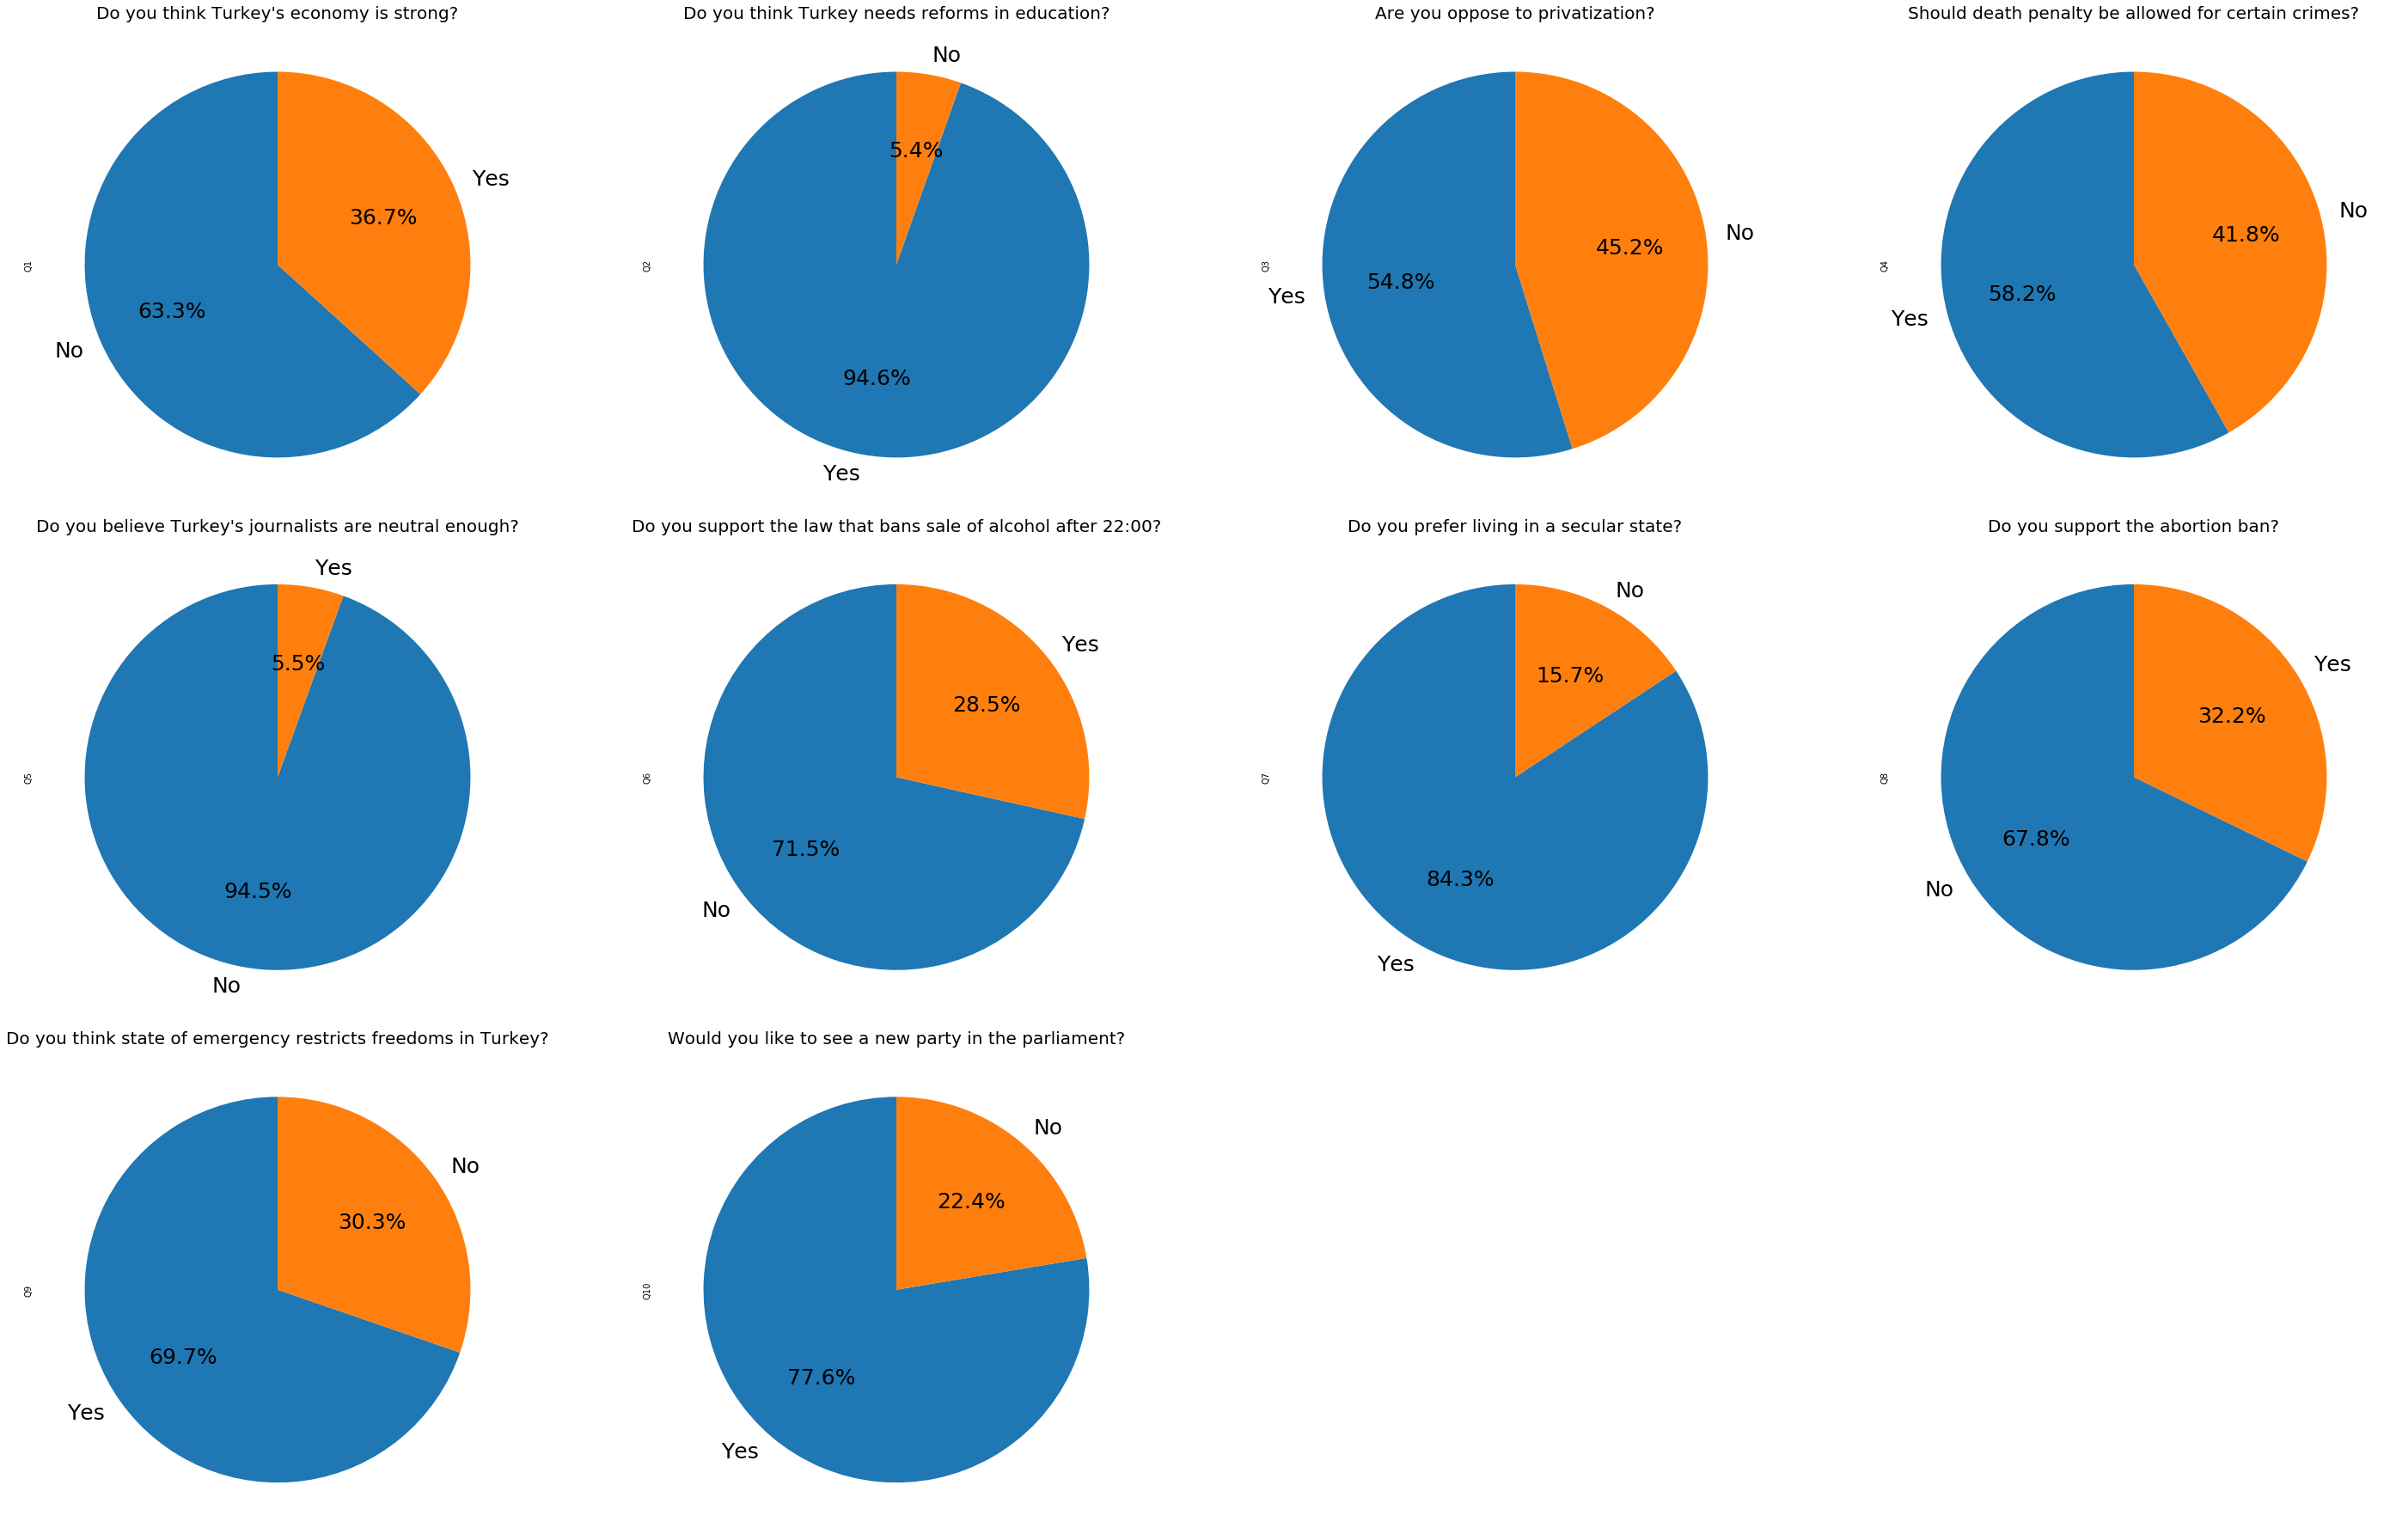

In [13]:
fig = plt.figure(figsize=(40,25))

#Plotting question 1's answers
fig.add_subplot(3,4,1)
q1 = df1['Q1'].value_counts()
ax = q1.plot.pie(autopct='%1.1f%%', startangle=90, textprops={'fontsize': 25})
ax.set_title("Do you think Turkey's economy is strong?",fontsize=20)

#Plotting question 2's answers
fig.add_subplot(3,4,2)
q2 = df1['Q2'].value_counts()
ax = q2.plot.pie(autopct='%1.1f%%', startangle=90, textprops={'fontsize': 25})
ax.set_title("Do you think Turkey needs reforms in education?",fontsize=20)

#Plotting question 3's answers
fig.add_subplot(3,4,3)
q3 = df1['Q3'].value_counts()
ax = q3.plot.pie(autopct='%1.1f%%', startangle=90,textprops={'fontsize': 25})
ax.set_title("Are you oppose to privatization?",fontsize=20)

#Plotting question 4's answers
fig.add_subplot(3,4,4)
q4 = df1['Q4'].value_counts()
ax = q4.plot.pie(autopct='%1.1f%%', startangle=90, textprops={'fontsize': 25})
ax.set_title("Should death penalty be allowed for certain crimes?",fontsize=20)

#Plotting question 5's answers
fig.add_subplot(3,4,5)
q5 = df1['Q5'].value_counts()
ax = q5.plot.pie(autopct='%1.1f%%', startangle=90, textprops={'fontsize': 25})
ax.set_title("Do you believe Turkey's journalists are neutral enough?",fontsize=20)

#Plotting question 6's answers
fig.add_subplot(3,4,6)
q6 = df1['Q6'].value_counts()
ax = q6.plot.pie(autopct='%1.1f%%', startangle=90, textprops={'fontsize': 25})
ax.set_title("Do you support the law that bans sale of alcohol after 22:00?",fontsize=20)

#Plotting question 7's answers
fig.add_subplot(3,4,7)
q7 = df1['Q7'].value_counts()
ax = q7.plot.pie(autopct='%1.1f%%', startangle=90, textprops={'fontsize': 25})
ax.set_title("Do you prefer living in a secular state?",fontsize=20)

#Plotting question 8's answers
fig.add_subplot(3,4,8)
q8 = df1['Q8'].value_counts()
ax = q8.plot.pie(autopct='%1.1f%%', startangle=90, textprops={'fontsize': 25})
ax.set_title("Do you support the abortion ban?",fontsize=20)

#Plotting question 9's answers
fig.add_subplot(3,4,9)
q9 = df1['Q9'].value_counts()
ax = q9.plot.pie(autopct='%1.1f%%', startangle=90, textprops={'fontsize': 25})
ax.set_title("Do you think state of emergency restricts freedoms in Turkey?",fontsize=20)

#Plotting question 10's answers
fig.add_subplot(3,4,10)
q10 = df1['Q10'].value_counts()
ax = q10.plot.pie(autopct='%1.1f%%', startangle=90, textprops={'fontsize': 25})
ax.set_title("Would you like to see a new party in the parliament?",fontsize=20)

plt.tight_layout()
plt.savefig('opinion',dpi=300)

In the light of above visualisations it can be seen that:
- More than 90% of participants agree on Turkey needs a reform in education and journalists are not neutral enough regardless of their political orientation.
- For other opinion questions, it is more obvious that participants tend to draw apart.

#### Following the pie chart visualisations, further analysis is conducted and mode's of opinion questions are observed with respect to political parties. 

In [14]:
d1=df1.groupby('Political_View').describe().iloc[:,14:15]
d2=df1.groupby('Political_View').describe().iloc[:,22:23]
d3=df1.groupby('Political_View').describe().iloc[:,26:27]
d4=df1.groupby('Political_View').describe().iloc[:,30:31]
d5=df1.groupby('Political_View').describe().iloc[:,34:35]
d6=df1.groupby('Political_View').describe().iloc[:,38:39]
d7=df1.groupby('Political_View').describe().iloc[:,42:43]
d8=df1.groupby('Political_View').describe().iloc[:,46:47]
d9=df1.groupby('Political_View').describe().iloc[:,50:51]
d10=df1.groupby('Political_View').describe().iloc[:,18:19]
result = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10], axis=1, sort=False)
result

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
,top,top,top,top,top,top,top,top,top,top
Political_View,,,,,,,,,,
AKP,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No
CHP,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes
HDP,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes
IYI PARTI,No,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes
MHP,No,Yes,No,Yes,No,No,Yes,Yes,No,Yes
Other,No,Yes,No,Yes,No,No,Yes,No,Yes,Yes


In Turkey, AKP is the current ruling party which is considered as a conservative party. On the other hand, CHP, HDP and IYI PARTI is considered as left parties whereas MHP is also a conservative party.

In the light of above table it can easily be seen that:
- MHP supporters mostly agree with AKP supporters due to the fact that they are more conservative people however still have some different opinions.
- Left oriented opposition party supporters almost agree on every issue which is an interesting observation. 

#### In order to gain more insight to dataset in scope of exploratory analysis, answers to opinion questions with respect to political views are visualised. ('Other' answers are not used.)

In [15]:
dataAKP = df1[(df1.Political_View == 'AKP')]
dataCHP = df1[(df1.Political_View == 'CHP')]
dataIYI = df1[(df1.Political_View == 'IYI PARTI')]
dataMHP = df1[(df1.Political_View == 'MHP')]
dataHDP = df1[(df1.Political_View == 'HDP')]
data = pd.concat([dataAKP, dataCHP, dataIYI, dataMHP, dataHDP])

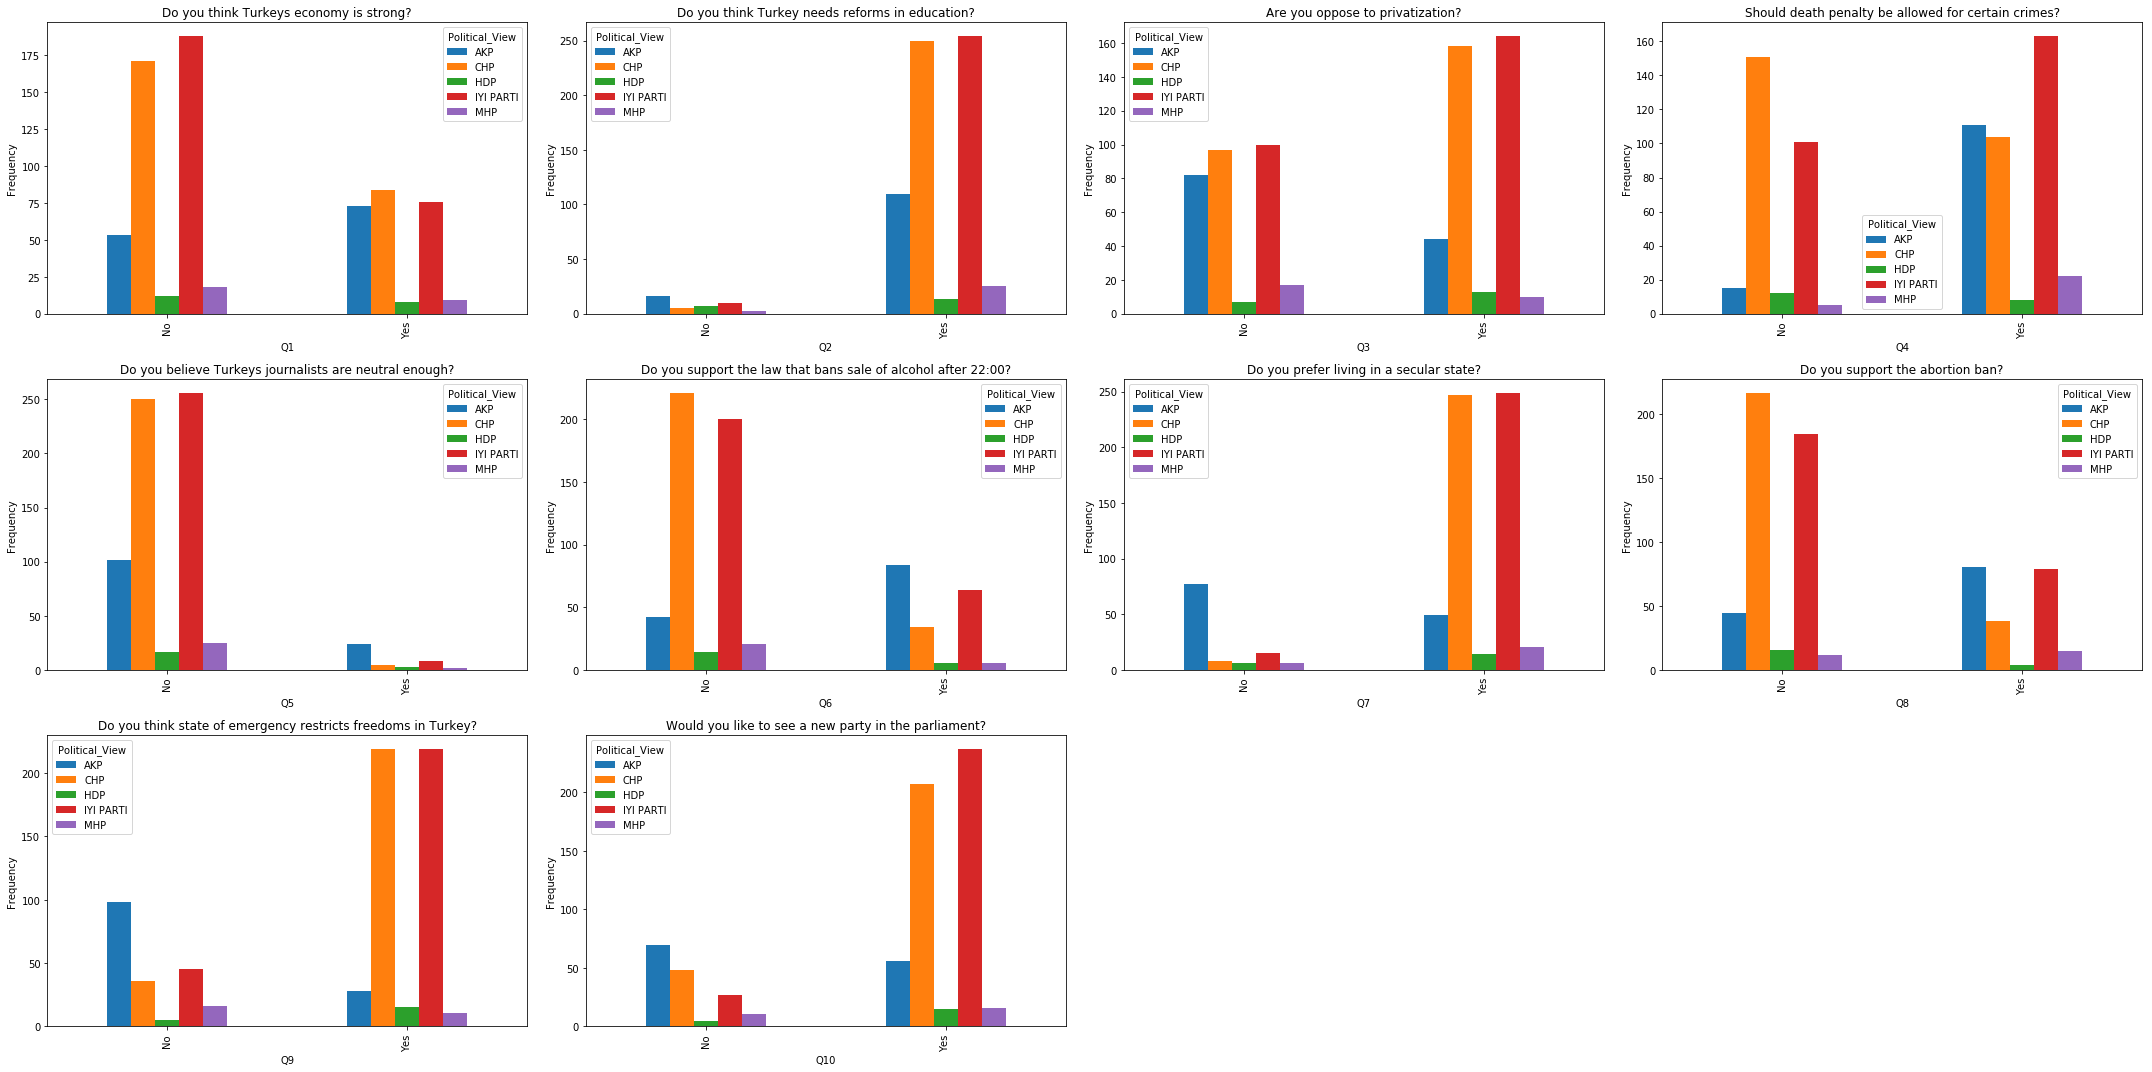

In [16]:
fig = plt.figure(figsize=(30,15))

#Plotting question 1's answers
ax= plt.subplot(341)
pd.crosstab(data.Q1,data.Political_View).plot(kind='bar',ax=ax)
plt.title('Do you think Turkeys economy is strong?')
plt.ylabel('Frequency')

#Plotting question 2's answers
ax= plt.subplot(342)
pd.crosstab(data.Q2,data.Political_View).plot(kind='bar',ax=ax)
plt.title('Do you think Turkey needs reforms in education?')
plt.ylabel('Frequency')

#Plotting question 3's answers
ax= plt.subplot(343)
pd.crosstab(data.Q3,data.Political_View).plot(kind='bar',ax=ax)
plt.title('Are you oppose to privatization?')
plt.ylabel('Frequency')

#Plotting question 4's answers
ax= plt.subplot(344)
pd.crosstab(data.Q4,data.Political_View).plot(kind='bar',ax=ax)
plt.title('Should death penalty be allowed for certain crimes?')
plt.ylabel('Frequency')

#Plotting question 5's answers
ax= plt.subplot(345)
pd.crosstab(data.Q5,data.Political_View).plot(kind='bar',ax=ax)
plt.title('Do you believe Turkeys journalists are neutral enough?')
plt.ylabel('Frequency')

#Plotting question 6's answers
ax= plt.subplot(346)
pd.crosstab(data.Q6,data.Political_View).plot(kind='bar',ax=ax)
plt.title('Do you support the law that bans sale of alcohol after 22:00?')
plt.ylabel('Frequency')

#Plotting question 7's answers
ax= plt.subplot(347)
pd.crosstab(data.Q7,data.Political_View).plot(kind='bar',ax=ax)
plt.title('Do you prefer living in a secular state?')
plt.ylabel('Frequency')

#Plotting question 8's answers
ax= plt.subplot(348)
pd.crosstab(data.Q8,data.Political_View).plot(kind='bar',ax=ax)
plt.title('Do you support the abortion ban?')
plt.ylabel('Frequency')

#Plotting question 9's answers
ax= plt.subplot(349)
pd.crosstab(data.Q9,data.Political_View).plot(kind='bar',ax=ax)
plt.title('Do you think state of emergency restricts freedoms in Turkey?')
plt.ylabel('Frequency')

#Plotting question 10's answers
ax= plt.subplot(3,4,10)
pd.crosstab(data.Q10,data.Political_View).plot(kind='bar',ax=ax)
plt.title('Would you like to see a new party in the parliament?')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('opinion2',dpi=300)

In order to prepare the data to logistic regression model, parties are grouped into two different views such as conservative and leftwing through mapping technique. In addition, opinion questions are visualised again with two different political views and by percentage this time. 

In [17]:
mapping1 = {'AKP':'Conservative', "CHP":'Leftwing', "IYI PARTI":'Leftwing', "MHP":'Conservative', "HDP":'Leftwing'}
data = data.replace(mapping1)

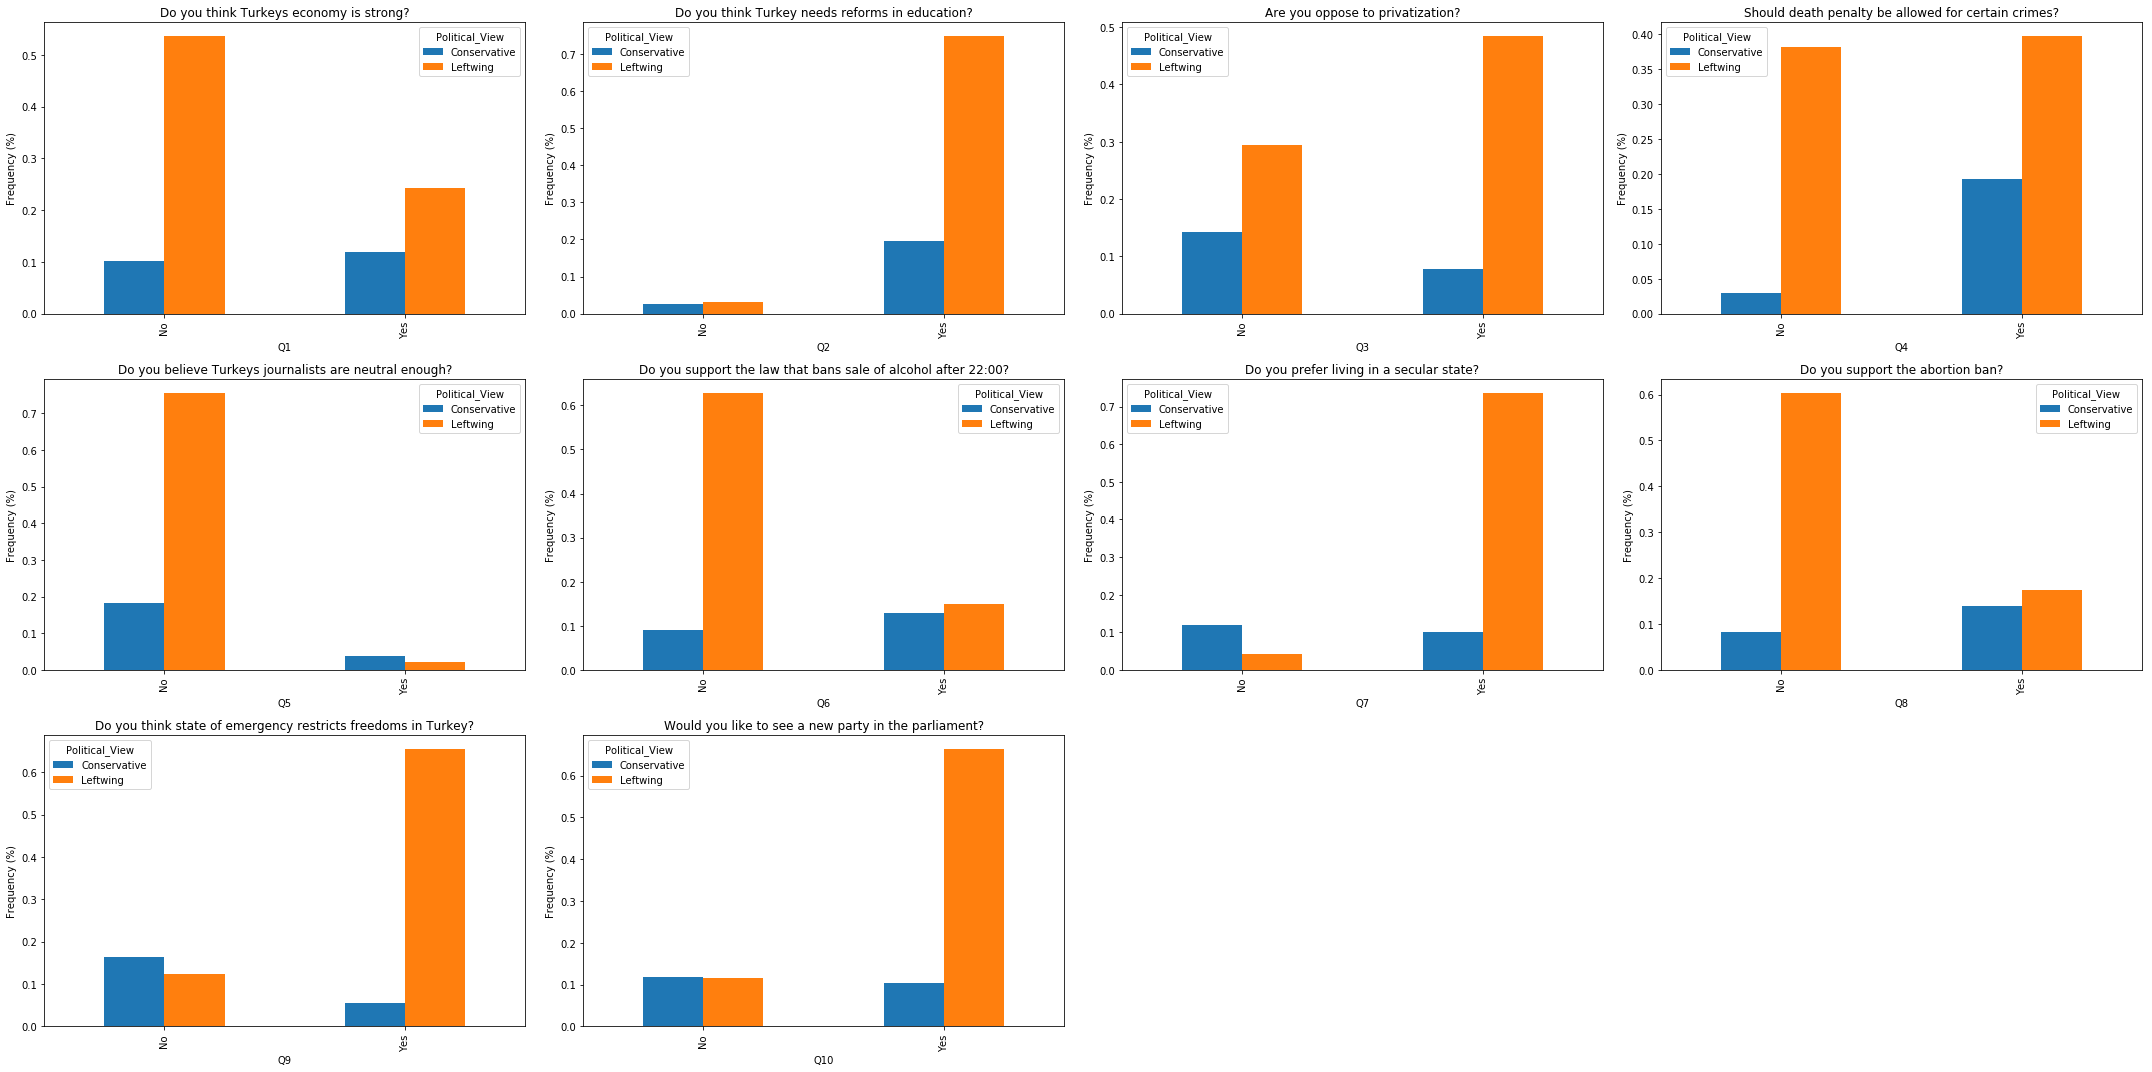

In [18]:
fig = plt.figure(figsize=(30,15))

#Plotting question 1's answers
ax= plt.subplot(341)
pd.crosstab(data.Q1,data.Political_View).apply(lambda r: r/len(data), axis=1).plot(kind='bar',ax=ax)
plt.title('Do you think Turkeys economy is strong?')
plt.ylabel('Frequency (%)')

#Plotting question 2's answers
ax= plt.subplot(342)
pd.crosstab(data.Q2,data.Political_View).apply(lambda r: r/len(data), axis=1).plot(kind='bar',ax=ax)
plt.title('Do you think Turkey needs reforms in education?')
plt.ylabel('Frequency (%)')

#Plotting question 3's answers
ax= plt.subplot(343)
pd.crosstab(data.Q3,data.Political_View).apply(lambda r: r/len(data), axis=1).plot(kind='bar',ax=ax)
plt.title('Are you oppose to privatization?')
plt.ylabel('Frequency (%)')

#Plotting question 4's answers
ax= plt.subplot(344)
pd.crosstab(data.Q4,data.Political_View).apply(lambda r: r/len(data), axis=1).plot(kind='bar',ax=ax)
plt.title('Should death penalty be allowed for certain crimes?')
plt.ylabel('Frequency (%)')

#Plotting question 5's answers
ax= plt.subplot(345)
pd.crosstab(data.Q5,data.Political_View).apply(lambda r: r/len(data), axis=1).plot(kind='bar',ax=ax)
plt.title('Do you believe Turkeys journalists are neutral enough?')
plt.ylabel('Frequency (%)')

#Plotting question 6's answers
ax= plt.subplot(346)
pd.crosstab(data.Q6,data.Political_View).apply(lambda r: r/len(data), axis=1).plot(kind='bar',ax=ax)
plt.title('Do you support the law that bans sale of alcohol after 22:00?')
plt.ylabel('Frequency (%)')

#Plotting question 7's answers
ax= plt.subplot(347)
pd.crosstab(data.Q7,data.Political_View).apply(lambda r: r/len(data), axis=1).plot(kind='bar',ax=ax)
plt.title('Do you prefer living in a secular state?')
plt.ylabel('Frequency (%)')

#Plotting question 8's answers
ax= plt.subplot(348)
pd.crosstab(data.Q8,data.Political_View).apply(lambda r: r/len(data), axis=1).plot(kind='bar',ax=ax)
plt.title('Do you support the abortion ban?')
plt.ylabel('Frequency (%)')

#Plotting question 9's answers
ax= plt.subplot(349)
pd.crosstab(data.Q9,data.Political_View).apply(lambda r: r/len(data), axis=1).plot(kind='bar',ax=ax)
plt.title('Do you think state of emergency restricts freedoms in Turkey?')
plt.ylabel('Frequency (%)')

#Plotting question 10's answers
ax= plt.subplot(3,4,10)
pd.crosstab(data.Q10,data.Political_View).apply(lambda r: r/len(data), axis=1).plot(kind='bar',ax=ax)
plt.title('Would you like to see a new party in the parliament?')
plt.ylabel('Frequency (%)')

plt.tight_layout()
plt.savefig('opinion2',dpi=300)

## 6. Logistic Regression
In order to prepare our dataset to logistic regression model, mapping technique is used so that our prediction target will be a binary variable (conservative/leftwing) and a new dataframe is created with using dummy variables (1/0). Column names of the new dataframe is changed in order not to get error messages while using smf.logit().fit().

In [19]:
df3=data.replace(mapping1)
df_new = pd.get_dummies(df3)
df_new.columns = ['Gender_Female','Gender_Male',
                  'Age_0_18','Age_18_30','Age_30_50','Age_50_60','Age_60plus',
                  'Region_Aegean','Region_Black_Sea','Region_Central_Anatolia','Region_Eastern_Anatolia',
                  'Region_Marmara','Region_Mediterranean','Region_Southeastern_Anatolia','Education_Primary_School',
                  'Education_Secondary_School', 'Education_High_School', 'Education_Foundation', 'Education_Bachelors',
                  'Education_Postgrad', 'Q1_No', 'Q1_Yes', 'Q2_No', 'Q2_Yes', 'Q3_No',
                  'Q3_Yes', 'Q4_No', 'Q4_Yes', 'Q5_No', 'Q5_Yes', 'Q6_No', 'Q6_Yes',
                  'Q7_No', 'Q7_Yes', 'Q8_No', 'Q8_Yes', 'Q9_No', 'Q9_Yes', 'Q10_No',
                  'Q10_Yes', 'Political_View_Conservative', 'Political_View_Leftwing']
df_new.head(2)

,Gender_Female,Gender_Male,Age_0_18,Age_18_30,Age_30_50,Age_50_60,Age_60plus,Region_Aegean,Region_Black_Sea,Region_Central_Anatolia,...,Q7_No,Q7_Yes,Q8_No,Q8_Yes,Q9_No,Q9_Yes,Q10_No,Q10_Yes,Political_View_Conservative,Political_View_Leftwing
1,0,1,0,1,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
12,0,1,0,1,0,0,0,0,0,1,...,0,1,1,0,0,1,1,0,1,0


In order to select best predictor variables to use in logistic regression model, a for loop has been used to detect whether their effect is significant or not. The parameter coefficient is printed if their effect is significant. 

In [33]:
predictorselection=[]
for i in df_new.columns[0:40]:
    
    fmodel = smf.logit('Political_View_Conservative ~'+ i, df_new).fit()
    diag2=[['Pseudo R^2',str(fmodel.prsquared)], ['AIC',str(fmodel.aic)]]
    print('Parameter name is: '+ i)
    print(tabulate(diag2,headers=['Diagnostics','Values'],numalign="right"))

    if fmodel.pvalues[0]<0.05:
        print('Intercept coefficient: ' + str(fmodel.params[0]))
        print()
    else:
        pass
    
    if fmodel.pvalues[1]<0.05:
        print('Parameter coefficient: ' + str(fmodel.params[1]))
        predictorselection.append([i,fmodel.params[1]])
        print()
    else:
        pass

Optimization terminated successfully.
         Current function value: 0.526355
         Iterations 5
Parameter name is: Gender_Female
Diagnostics        Values
-------------  ----------
Pseudo R^2     0.00367117
AIC               732.475
Intercept coefficient: -1.3087361267740285

Optimization terminated successfully.
         Current function value: 0.526355
         Iterations 5
Parameter name is: Gender_Male
Diagnostics        Values
-------------  ----------
Pseudo R^2     0.00367117
AIC               732.475
Intercept coefficient: -0.8167611365271287

Optimization terminated successfully.
         Current function value: 0.526990
         Iterations 5
Parameter name is: Age_0_18
Diagnostics        Values
-------------  ----------
Pseudo R^2     0.00246886
AIC               733.354
Intercept coefficient: -1.1565501257743205

Optimization terminated successfully.
         Current function value: 0.528099
         Iterations 5
Parameter name is: Age_18_30
Diagnostics        Values
-

Parameter name is: Q6_Yes
Diagnostics      Values
-------------  --------
Pseudo R^2     0.116333
AIC             650.102
Intercept coefficient: -1.9322113046971665

Parameter coefficient: 1.7876300758860582

Optimization terminated successfully.
         Current function value: 0.401255
         Iterations 6
Parameter name is: Q7_No
Diagnostics      Values
-------------  --------
Pseudo R^2      0.24047
AIC             559.337
Intercept coefficient: -1.9859154836690291

Parameter coefficient: 3.037460261479153

Optimization terminated successfully.
         Current function value: 0.401255
         Iterations 6
Parameter name is: Q7_Yes
Diagnostics      Values
-------------  --------
Pseudo R^2      0.24047
AIC             559.337
Intercept coefficient: 1.051544777810088

Parameter coefficient: -3.0374602614790986

Optimization terminated successfully.
         Current function value: 0.467137
         Iterations 6
Parameter name is: Q8_No
Diagnostics      Values
-------------  ------

#### Effective variables have been stored in an array called 'predictorselection' as well as their values. 

In [21]:
predictorselection

[['Age_30_50', 0.6723992246917123],
 ['Education_Primary_School', 1.2880888373871209],
 ['Education_High_School', -0.42535958252246653],
 ['Education_Foundation', 0.6836704108591463],
 ['Q1_No', -0.9362774534271081],
 ['Q1_Yes', 0.9362774534271218],
 ['Q2_No', 1.142097400607846],
 ['Q2_Yes', -1.1420974006078808],
 ['Q3_No', 1.1021463415511474],
 ['Q3_Yes', -1.102146341551155],
 ['Q4_No', -1.8537948601475098],
 ['Q4_Yes', 1.853794860147481],
 ['Q5_No', -1.900902193387994],
 ['Q5_Yes', 1.9009021933880275],
 ['Q6_No', -1.7876300758860462],
 ['Q6_Yes', 1.7876300758860582],
 ['Q7_No', 3.037460261479153],
 ['Q7_Yes', -3.0374602614790986],
 ['Q8_No', -1.7609878105613233],
 ['Q8_Yes', 1.7609878105613073],
 ['Q9_No', 2.7341816314943665],
 ['Q9_Yes', -2.7341816314943546],
 ['Q10_No', 1.8648066110430488],
 ['Q10_Yes', -1.864806611043037]]

#### In order to justify the selection of predictors, correlations are also observed.

In [22]:
x_corr = ['Gender_Female','Gender_Male',
          'Age_0_18','Age_18_30','Age_30_50','Age_50_60','Age_60plus',
          'Region_Aegean','Region_Black_Sea','Region_Central_Anatolia','Region_Eastern_Anatolia',
          'Region_Marmara','Region_Mediterranean','Region_Southeastern_Anatolia','Education_Primary_School',
          'Education_Secondary_School', 'Education_High_School', 'Education_Foundation', 'Education_Bachelors',
          'Education_Postgrad', 'Q1_No', 'Q2_No','Q3_No','Q4_No', 'Q5_No', 'Q6_No',
          'Q7_No', 'Q8_No', 'Q9_No','Q10_No','Political_View_Conservative','Political_View_Leftwing']
dfcorr=df_new[x_corr[0:32]]

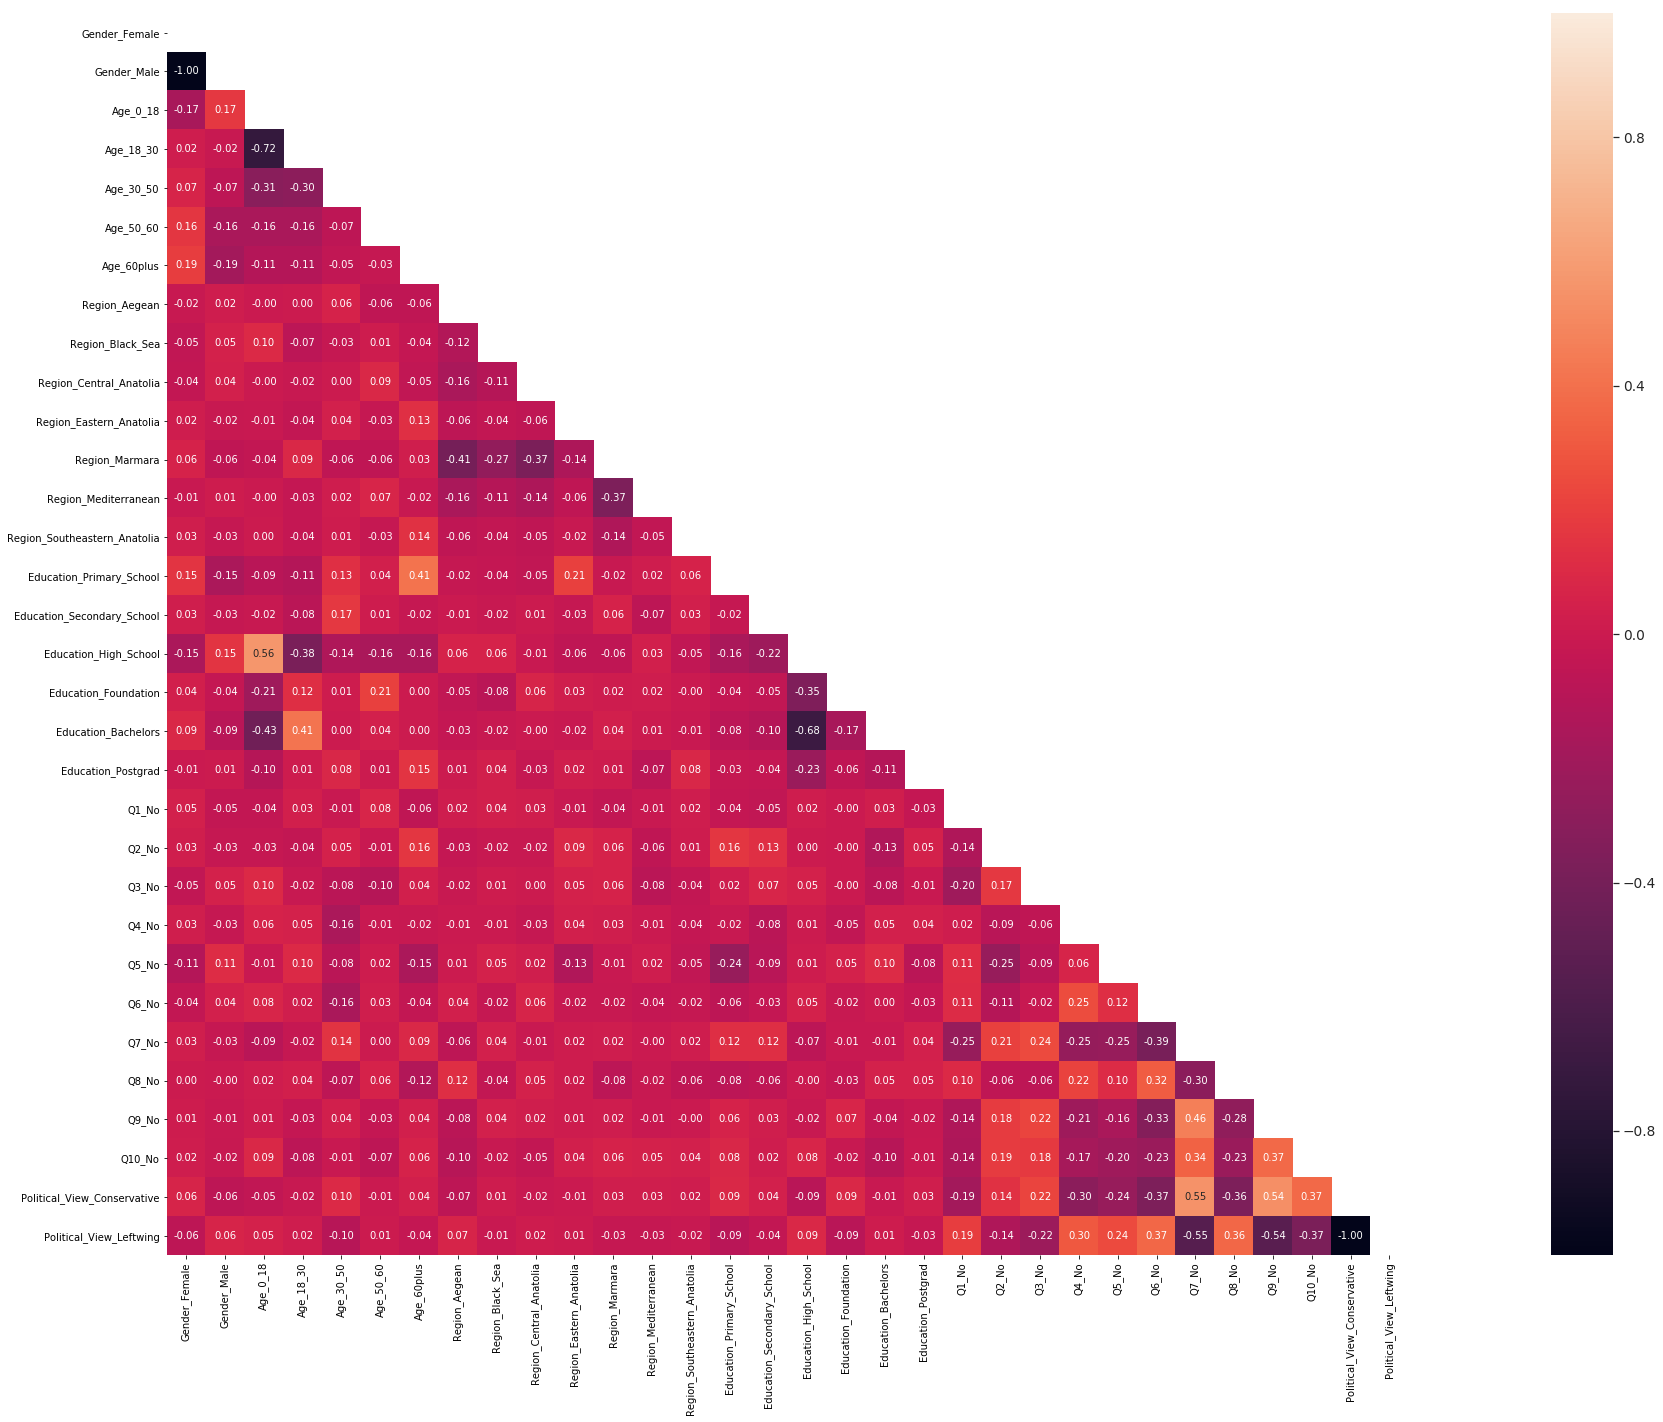

In [23]:
#Heatmap to observe correlations
#Based on https://www.kaggle.com/yemregundogmus/forecast-on-turkish-political-opinions
#Based on https://seaborn.pydata.org/examples/many_pairwise_correlations.html

corrmat = dfcorr.corr()
cols = corrmat.columns

mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(40, 20))
cm = np.corrcoef(dfcorr[cols].values.T)

sns.set(font_scale=1.25)
corrmap = sns.heatmap(cm, mask=mask, cbar=True, annot=True, square=True, fmt='.2f',
                      annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()
plt.savefig('corr_heat',dpi=300)

Since there are significant number of variables, heatmap can be relatively hard to interpret. Since the prediction target will be the 'Political_View_Conservative' variable, one can simple display the correlation between other variables and 'Political_View_Conservative' variable.

In [24]:
corrmat['Political_View_Conservative']

Gender_Female                   0.064523
Gender_Male                    -0.064523
Age_0_18                       -0.050867
Age_18_30                      -0.019764
Age_30_50                       0.099389
Age_50_60                      -0.005830
Age_60plus                      0.035928
Region_Aegean                  -0.068155
Region_Black_Sea                0.012711
Region_Central_Anatolia        -0.015225
Region_Eastern_Anatolia        -0.007568
Region_Marmara                  0.028942
Region_Mediterranean            0.029036
Region_Southeastern_Anatolia    0.022375
Education_Primary_School        0.089280
Education_Secondary_School      0.042392
Education_High_School          -0.088035
Education_Foundation            0.088053
Education_Bachelors            -0.011069
Education_Postgrad              0.027479
Q1_No                          -0.193736
Q2_No                           0.136622
Q3_No                           0.224656
Q4_No                          -0.302927
Q5_No           

#### Since negative correlation is as well as important as positive correlation, absolute values of correlations are sorted in order to observe highest correlation values.

In [25]:
#https://stackoverflow.com/questions/51358289/pandas-sort-column-by-absolute-correlation-to-first-column
ix = abs(dfcorr.corr()).sort_values('Political_View_Conservative', ascending=False).index
ix

Index(['Political_View_Leftwing', 'Political_View_Conservative', 'Q7_No',
       'Q9_No', 'Q10_No', 'Q6_No', 'Q8_No', 'Q4_No', 'Q5_No', 'Q3_No', 'Q1_No',
       'Q2_No', 'Age_30_50', 'Education_Primary_School',
       'Education_Foundation', 'Education_High_School', 'Region_Aegean',
       'Gender_Male', 'Gender_Female', 'Age_0_18',
       'Education_Secondary_School', 'Age_60plus', 'Region_Mediterranean',
       'Region_Marmara', 'Education_Postgrad', 'Region_Southeastern_Anatolia',
       'Age_18_30', 'Region_Central_Anatolia', 'Region_Black_Sea',
       'Education_Bachelors', 'Region_Eastern_Anatolia', 'Age_50_60'],
      dtype='object')

#### It can be noted that variables in the 'predictorselection' array has the highest correlation values. Therefore they'll be used as predictors in logistic regression model. The target variable will be 'Political_View_Conservative'.

In [26]:
y=['Political_View_Conservative']
x=['Age_30_50', 'Education_Primary_School', 'Education_High_School', 'Education_Foundation', 'Q1_No','Q1_Yes','Q2_No',
   'Q2_Yes', 'Q3_No','Q3_Yes','Q4_No','Q4_Yes','Q5_No','Q5_Yes','Q6_No','Q6_Yes','Q7_No','Q7_Yes',
   'Q8_No','Q8_Yes','Q9_No','Q9_Yes','Q10_No','Q10_Yes']

In [27]:
nmodel = smf.logit('Political_View_Conservative ~ Age_30_50+Education_Primary_School'
                   '+Education_High_School+Education_Foundation+Q1_No+'
                   '+Q2_No+Q3_No+Q4_No+Q5_No+Q6_No+Q7_No+Q8_No+Q9_No+Q10_No', df_new).fit()

effects=[['Intercept',str(nmodel.params[0])], ['Age_30_50',str(nmodel.params[1])],
        ['Education_Primary_School',str(nmodel.params[2])],
        ['Education_High_School',str(nmodel.params[3])],
        ['Education_Foundation',str(nmodel.params[4])],
        ['Q1_No',str(nmodel.params[5])], ['Q2_No',str(nmodel.params[6])], 
        ['Q3_No',str(nmodel.params[7])], ['Q4_No',str(nmodel.params[8])],
        ['Q5_No',str(nmodel.params[9])],['Q6_No',str(nmodel.params[10])],
        ['Q7_No',str(nmodel.params[11])],['Q8_No',str(nmodel.params[12])],
        ['Q9_No',str(nmodel.params[13])],['Q10_No',str(nmodel.params[14])]]
print()
print(tabulate(effects,headers=['Effects','Values'],numalign="right"))
display('P-Values')
print(round(nmodel.pvalues,5))

print()
diag=[['Pseudo R^2',str(nmodel.prsquared)], ['AIC',str(nmodel.aic)], ['BIC',str(nmodel.bic)],
   ['LogLik',str(nmodel.llf)], ['LRR p-values',str(nmodel.llr_pvalue)]]

print(tabulate(diag,headers=['Diagnostics','Values'],numalign="right"))

Optimization terminated successfully.
         Current function value: 0.292074
         Iterations 7

Effects                      Values
------------------------  ---------
Intercept                 0.0699153
Age_30_50                 0.0385562
Education_Primary_School  -0.578542
Education_High_School     -0.390848
Education_Foundation       0.599038
Q1_No                     -0.223207
Q2_No                     -0.960193
Q3_No                      0.586827
Q4_No                      -1.13356
Q5_No                      -1.48241
Q6_No                     -0.474127
Q7_No                       1.54368
Q8_No                     -0.893697
Q9_No                       1.71845
Q10_No                      0.77358


'P-Values'

Intercept                   0.91223
Age_30_50                   0.93070
Education_Primary_School    0.58380
Education_High_School       0.19473
Education_Foundation        0.21752
Q1_No                       0.41830
Q2_No                       0.07725
Q3_No                       0.03117
Q4_No                       0.00033
Q5_No                       0.00426
Q6_No                       0.10141
Q7_No                       0.00000
Q8_No                       0.00102
Q9_No                       0.00000
Q10_No                      0.00847
dtype: float64

Diagnostics         Values
-------------  -----------
Pseudo R^2        0.447138
AIC                 434.23
BIC                502.324
LogLik            -202.115
LRR p-values   2.80278e-61


In [31]:
#Based on http://dataaspirant.com/2017/05/15/implement-multinomial-logistic-regression-python/
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

train_x, test_x, train_y, test_y = train_test_split(df_new[x[0:24]], df_new[y].values.ravel('K'),  train_size=0.8, test_size=0.2)
logreg = LogisticRegression(solver='newton-cg').fit(train_x, train_y)

from sklearn.metrics import accuracy_score

print("Logistic regression Train Accuracy : ", accuracy_score(train_y, logreg.predict(train_x)))
print("Logistic regression Test Accuracy : ", accuracy_score(test_y, logreg.predict(test_x)))

Logistic regression Train Accuracy :  0.8752260397830018
Logistic regression Test Accuracy :  0.9064748201438849


In [32]:
#Based on https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(test_y, logreg.predict(test_x))
print(confusion_matrix)

[[107   4]
 [  9  19]]


## Conclusion
- A logistic regression model has been built in order to predict political orientation of the participant in light of their answers to political opinion questions and some demographic information of them.
- This model has an accuracy of 88% which is significantly high.
- The model predicted the political orientation correctly 126 times and incorrectly 13 times.